# 项目：未前往就诊的挂号预约（Kaggle 的原始数据）

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='#intro'></a>
## 简介
本章节简单介绍，数据的基本信息、初步数据评估以及阐述本课题需探索的问题

In [2]:
# 导入数据包
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
rawdata_csv = pd.read_csv("../data/noshowappointments-kagglev2-may-2016.csv")
print("rawdata csv dataframe shape info: {} ".format(rawdata_csv.shape))
rawdata_csv.head(10)


rawdata csv dataframe shape info: (110527, 14) 


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [4]:
rawdata_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### 数据的基本信息
从上面可得到如下关于数据的信息：  
1.总共有110527行数据，无空行  
2.数据由14列组成  
3.列数据类型：1组float64，8组int64，5组object  
每列数据的含义分别是：病人编号、预约号、性别、计划日期、预约出诊日期、年龄、位置、是否有社保、是否有高血压（hypertension）、是否有糖尿病、是否酗酒、是否残障（handicap）、是否收到短信、是否爽约。
是否爽约是本次数据分析的因变量、其余13个变量均是自变量。
### 初步数据评估
从初步分析原始数据，可以得出如下评估项：  
1.数据列标签存在错误拼写，为便于理解需更正，同时列标签命名规范需统一一下，方便后续数据分析  
2.病人号为浮点型，应转换成整形  
3.预约及计划日期需转换成datatime类型，便于数据处理   

### 本课题需探索的问题
本课题旨在研究挂号毁约主要影响因素有哪些。是否毁约是本次课题研究的因变量、其余13项为自变量。每一项都有可能与是否爽约有直接或间接的关联。 
本课题会通过数据逐一探索每一个自变量与因变量的关联。旨在找出影响因变量的自变量。  
但是，由于客观原因，对部分自变量的含义不清楚，比如病人号、预约号，这些都是医院自动生成，无从知晓其具体含义。
因此本课题主要探索剩余11个自变量与因变量的关系。

<a id='wrangling'></a>
## 数据整理

按评估数据列出项，先对数据进行清理  

### 规范数据

In [43]:
# rename列标签
old_name = ["Hipertension","Handcap","SMS_received","No-show"]
new_name = ["Hypertension","Handicap","SMSreceived","Noshow"]
rawdata_csv.rename(columns=dict(zip(old_name,new_name)),inplace=True)

print("new columns names:{} ".format(rawdata_csv.columns.tolist()))


new columns names:['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMSreceived', 'Noshow', 'AppointmentWeekday', 'ApartDay'] 


In [6]:
# 转换数据类型
rawdata_csv["PatientId"] = rawdata_csv["PatientId"].astype("int64")
rawdata_csv["ScheduledDay"] = pd.to_datetime(rawdata_csv["ScheduledDay"]).dt.date.astype('datetime64[ns]')
rawdata_csv["AppointmentDay"] = pd.to_datetime(rawdata_csv["AppointmentDay"]).dt.date.astype('datetime64[ns]')
rawdata_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null int64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMSreceived       110527 non-null int64
Noshow            110527 non-null object
dtypes: datetime64[ns](2), int64(9), object(3)
memory usage: 11.8+ MB


In [7]:
#了解列数据情况
print("the unique 'Gender' values: {} ".format(rawdata_csv.Gender.unique()))
print("the range of age: {} ~ {}".format(rawdata_csv.Age.min(),rawdata_csv.Age.max()))
#print("Neighbourhood values: {} ".format(rawdata_csv.Neighbourhood.unique()))
print("the unique 'Scholarship' values: {} ".format(rawdata_csv.Scholarship.unique()))
print("the unique 'Hypertension' values: {} ".format(rawdata_csv.Hypertension.unique()))
print("the unique  'Diabetes' values: {} ".format(rawdata_csv.Diabetes.unique()))
print("the unique  'Alcoholism' values: {} ".format(rawdata_csv.Alcoholism.unique()))
print("the unique  'Handicap' values: {} ".format(rawdata_csv.Handicap.unique()))
print("the unique  'SMSreceived' values: {} ".format(rawdata_csv.SMSreceived.unique()))
print("the unique  'Noshow' values: {} ".format(rawdata_csv.Noshow.unique()))


the unique 'Gender' values: ['F' 'M'] 
the range of age: -1 ~ 115
the unique 'Scholarship' values: [0 1] 
the unique 'Hypertension' values: [1 0] 
the unique  'Diabetes' values: [0 1] 
the unique  'Alcoholism' values: [0 1] 
the unique  'Handicap' values: [0 1 2 3 4] 
the unique  'SMSreceived' values: [0 1] 
the unique  'Noshow' values: ['No' 'Yes'] 


从上面可知：  
1.Handicap分为5个等级。  
2.年龄存在小于0的值，存在非法值，下面进行清理。  
3.其他列都只有两个值，数据类型并不需要int64，可转换成bool类型。（有问题，先换成object类型）
疑问：(改成bool后，sns.countplot(x=rawdata_csv.Scholarship,hue=rawdata_csv.Noshow,data=rawdata_csv)存在报错，原因是？)

### 优化数据

In [8]:
#优化数据类型
rawdata_csv["Scholarship"] = rawdata_csv["Scholarship"].astype("object")
rawdata_csv["Hypertension"] = rawdata_csv["Hypertension"].astype("object")
rawdata_csv["Diabetes"] = rawdata_csv["Diabetes"].astype("object")
rawdata_csv["Alcoholism"] = rawdata_csv["Alcoholism"].astype("object")
rawdata_csv["SMSreceived"] = rawdata_csv["SMSreceived"].astype("object")
rawdata_csv["Handicap"] = rawdata_csv["Handicap"].astype("object")
print("Handicap values: {} ".format(rawdata_csv.Handicap.unique()))
rawdata_csv.info()

Handicap values: [0 1 2 3 4] 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null int64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null object
Hypertension      110527 non-null object
Diabetes          110527 non-null object
Alcoholism        110527 non-null object
Handicap          110527 non-null object
SMSreceived       110527 non-null object
Noshow            110527 non-null object
dtypes: datetime64[ns](2), int64(3), object(9)
memory usage: 11.8+ MB



### 删除无效数据
从上面可知，年龄最小值为－1，说明年龄存在无效值。需剔出无效值。


In [9]:
print("the unique value in 'Age' : {} ".format(np.sort(rawdata_csv.Age.unique())))
print("the invaild 'Age' number: {} ".format(rawdata_csv[rawdata_csv.Age < 0].shape[0]))
#剔出年龄小于0的行
rawdata_csv = rawdata_csv[rawdata_csv.Age >= 0]

the unique value in 'Age' : [ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 102 115] 
the invaild 'Age' number: 1 


### 处理数据
是否爽约可能与如下间接数据有关，为便于处理，可新建列：
1.就诊日期是星期几。
2.预约日期与计划就诊日期间隔。


In [10]:
rawdata_csv["AppointmentWeekday"] = rawdata_csv.AppointmentDay.dt.weekday_name
rawdata_csv["ApartDay"] = (rawdata_csv["AppointmentDay"].dt.date  - rawdata_csv["ScheduledDay"].dt.date).dt.days
print("there are {} records ApartDay < 0 :".format(rawdata_csv[rawdata_csv.ApartDay<0].shape[0]))
#有5行数据，就诊日期比预约日期早，该数据无效，删除该数据
rawdata_csv = rawdata_csv[rawdata_csv.ApartDay >= 0]
print("the Unique Values in `ScheduledDay`: {}".format(np.sort(rawdata_csv.ScheduledDay.dt.strftime('%Y-%m-%d').unique())))
print("the Unique Values in `AppointmentDay`: {}".format(np.sort(rawdata_csv.AppointmentDay.dt.strftime('%Y-%m-%d').unique())))

there are 5 records ApartDay < 0 :
the Unique Values in `ScheduledDay`: ['2015-11-10' '2015-12-03' '2015-12-07' '2015-12-08' '2015-12-14'
 '2015-12-15' '2016-01-04' '2016-01-05' '2016-01-07' '2016-01-11'
 '2016-01-13' '2016-01-14' '2016-01-19' '2016-01-20' '2016-01-21'
 '2016-01-22' '2016-01-25' '2016-01-26' '2016-01-27' '2016-01-28'
 '2016-01-29' '2016-02-01' '2016-02-02' '2016-02-03' '2016-02-04'
 '2016-02-05' '2016-02-11' '2016-02-12' '2016-02-15' '2016-02-16'
 '2016-02-17' '2016-02-18' '2016-02-19' '2016-02-22' '2016-02-23'
 '2016-02-24' '2016-02-25' '2016-02-26' '2016-02-29' '2016-03-01'
 '2016-03-02' '2016-03-03' '2016-03-04' '2016-03-05' '2016-03-07'
 '2016-03-08' '2016-03-09' '2016-03-10' '2016-03-11' '2016-03-14'
 '2016-03-15' '2016-03-16' '2016-03-17' '2016-03-18' '2016-03-19'
 '2016-03-21' '2016-03-22' '2016-03-23' '2016-03-28' '2016-03-29'
 '2016-03-30' '2016-03-31' '2016-04-01' '2016-04-05' '2016-04-06'
 '2016-04-07' '2016-04-08' '2016-04-09' '2016-04-11' '2016-04-12'
 '20

从如上数据可知： 
1.计划的日期范围：2015-11-10至 2016-06-08，间隔约8个月  
2.预约就诊日期范围：2016-04-29至 2016-06-08，间隔40天

In [11]:
print("the Unique Values in `Neighbourhood` : {}".format(np.sort(rawdata_csv.Neighbourhood.unique())))
print("Total Counts for `Neighbourhood` : {}".format(rawdata_csv.Neighbourhood.unique().size))

the Unique Values in `Neighbourhood` : ['AEROPORTO' 'ANDORINHAS' 'ANTÔNIO HONÓRIO' 'ARIOVALDO FAVALESSA'
 'BARRO VERMELHO' 'BELA VISTA' 'BENTO FERREIRA' 'BOA VISTA' 'BONFIM'
 'CARATOÍRA' 'CENTRO' 'COMDUSA' 'CONQUISTA' 'CONSOLAÇÃO' 'CRUZAMENTO'
 'DA PENHA' 'DE LOURDES' 'DO CABRAL' 'DO MOSCOSO' 'DO QUADRO'
 'ENSEADA DO SUÁ' 'ESTRELINHA' 'FONTE GRANDE' 'FORTE SÃO JOÃO' 'FRADINHOS'
 'GOIABEIRAS' 'GRANDE VITÓRIA' 'GURIGICA' 'HORTO' 'ILHA DAS CAIEIRAS'
 'ILHA DE SANTA MARIA' 'ILHA DO BOI' 'ILHA DO FRADE' 'ILHA DO PRÍNCIPE'
 'ILHAS OCEÂNICAS DE TRINDADE' 'INHANGUETÁ' 'ITARARÉ' 'JABOUR'
 'JARDIM CAMBURI' 'JARDIM DA PENHA' 'JESUS DE NAZARETH' 'JOANA D´ARC'
 'JUCUTUQUARA' 'MARIA ORTIZ' 'MARUÍPE' 'MATA DA PRAIA' 'MONTE BELO'
 'MORADA DE CAMBURI' 'MÁRIO CYPRESTE' 'NAZARETH' 'NOVA PALESTINA'
 'PARQUE INDUSTRIAL' 'PARQUE MOSCOSO' 'PIEDADE' 'PONTAL DE CAMBURI'
 'PRAIA DO CANTO' 'PRAIA DO SUÁ' 'REDENÇÃO' 'REPÚBLICA' 'RESISTÊNCIA'
 'ROMÃO' 'SANTA CECÍLIA' 'SANTA CLARA' 'SANTA HELENA' 'SANTA LUÍZA'
 'SA

就诊病人来自81个地区。

In [12]:
rawdata_csv.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSreceived,Noshow,AppointmentWeekday,ApartDay
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,0
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,0
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,0
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,0
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,0


<a id='eda'></a>
## 探索性数据分析

> **提示**在你完成数据整理和清理之后，现在可以进行探索性数据分析了。你需要计算统计值，创建可视化图表，解决你在一开始的简介部分中提出的研究问题。我们推荐你采用系统化方法。一次只探索一个变量，然后探索变量之间的关系。

### Show与Noshow

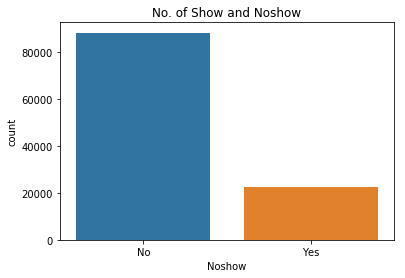

In [13]:
ax = sns.countplot(x=rawdata_csv.Noshow, data=rawdata_csv)
ax.set_title("No. of Show and Noshow")
plt.show()

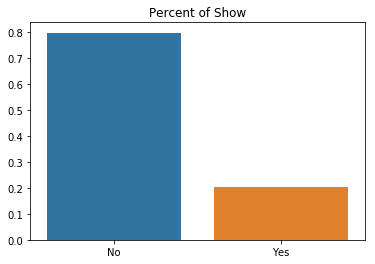

In [39]:
show_counts_normalize = rawdata_csv.Noshow.value_counts(normalize=True)
ax = sns.barplot(x=show_counts_normalize.index,y=show_counts_normalize.values)
ax.set_title("Percent of Show")
plt.show()

In [14]:
print(rawdata_csv.groupby(['Noshow']).size())
noshow = rawdata_csv.groupby(['Noshow']).size()[1]
print(type(noshow))
show = rawdata_csv.groupby(['Noshow']).size()[0]
showPercent = show /(noshow + show)
print("The percent of who showed up : {}% ".format(float("%.2f" % (showPercent*100))))
print("The percent of who did not showed up : {}% ".format("%.2f" % ((1-showPercent)*100)))

Noshow
No     88207
Yes    22314
dtype: int64
<class 'numpy.int64'>
The percent of who showed up : 79.81% 
The percent of who did not showed up : 20.19% 


有约20%的人爽约

### Gender

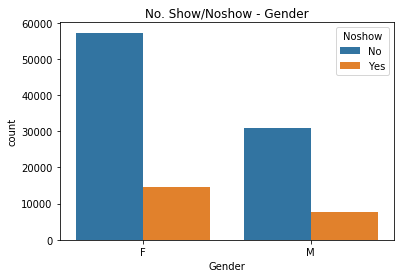

In [15]:
ax = sns.countplot(x=rawdata_csv.Gender,hue=rawdata_csv.Noshow,data=rawdata_csv)
ax.set_title("No. Show/Noshow - Gender")
plt.show()

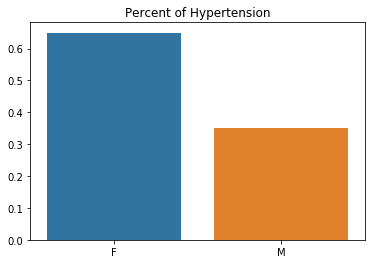

In [38]:
gender_counts_normalize = rawdata_csv.Gender.value_counts(normalize=True)
ax = sns.barplot(x=gender_counts_normalize.index,y=gender_counts_normalize.values)
ax.set_title("Percent of Hypertension")
plt.show()

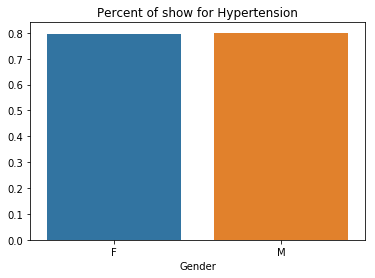

In [37]:
gender_ratio = rawdata_csv[rawdata_csv.Noshow == 'No'].groupby(['Gender']).size()/rawdata_csv.groupby(['Gender']).size()
ax = sns.barplot(x=gender_ratio.index, y=gender_ratio, order=gender_ratio.index)
ax.set_title("Percent of show for Hypertension") 
plt.show()

爽约情况基于性别分析：   
1.女性约占就诊人数的65%  
2.男女爽约情况相当，说明与性别无关

### Age

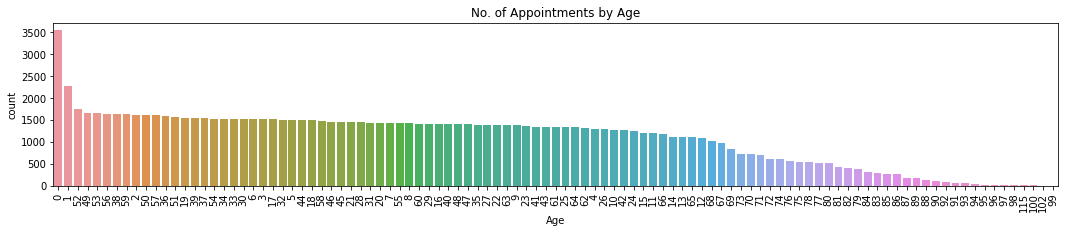

In [33]:
plt.figure(figsize=(18,3))
ax = sns.countplot(x=rawdata_csv.Age,order=rawdata_csv.Age.value_counts().index)
plt.xticks(rotation=90)
ax.set_title("No. of Appointments by Age")
plt.show()

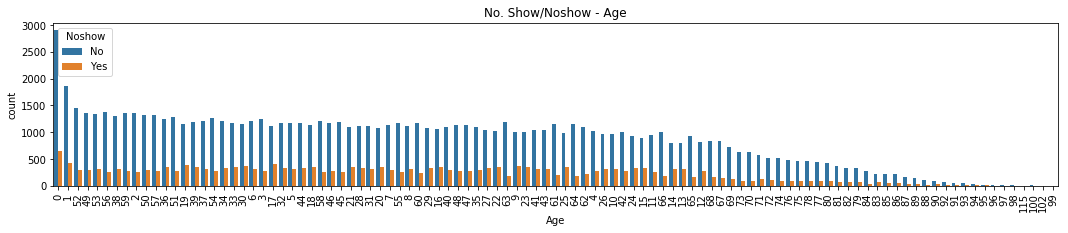

In [34]:
plt.figure(figsize=(18,3))
ax = sns.countplot(x=rawdata_csv.Age,hue=rawdata_csv.Noshow,order=rawdata_csv.Age.value_counts().index)
ax.set_title("No. Show/Noshow - Age")
plt.xticks(rotation=90)
plt.show()

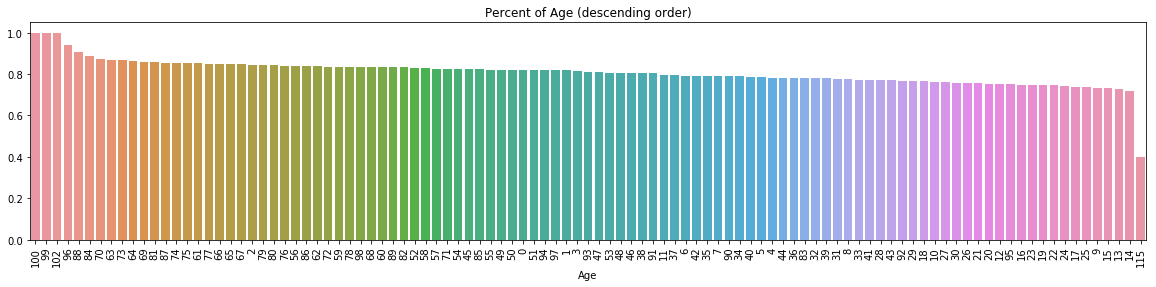

In [35]:
age_ratio = rawdata_csv[rawdata_csv.Noshow == 'No'].groupby(['Age']).size()/rawdata_csv.groupby(['Age']).size()
age_ratio= age_ratio.sort_values(ascending=False)
plt.figure(figsize=(20,4))
ax = sns.barplot(x=age_ratio.index, y=age_ratio, order=age_ratio.index)
ax.set_title("Percent of Age (descending order)") 
plt.xticks(rotation=90)
plt.show()

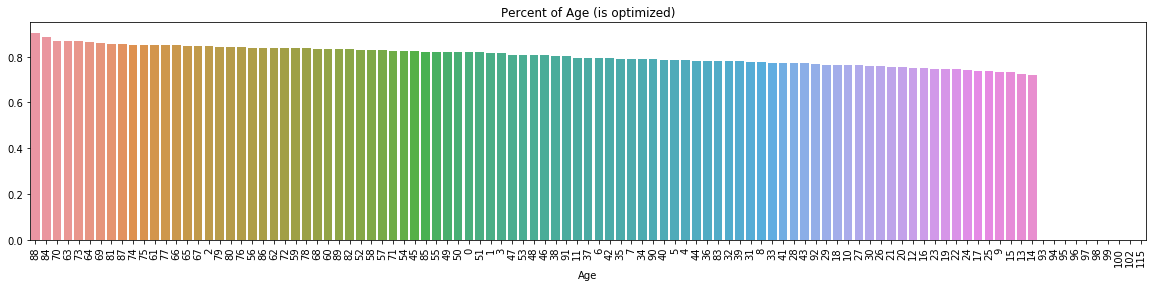

In [36]:
after_deal_datasize = rawdata_csv[rawdata_csv.Noshow == 'No'].groupby(['Age']).size()
after_deal_data = after_deal_datasize[after_deal_datasize.values>50]
age_ratio = after_deal_data/rawdata_csv.groupby(['Age']).size()
age_ratio= age_ratio.sort_values(ascending=False)
plt.figure(figsize=(20,4))
ax = sns.barplot(x=age_ratio.index, y=age_ratio, order=age_ratio.index)
ax.set_title("Percent of Age (is optimized)")
plt.xticks(rotation=90)
plt.show()

就诊情况与年龄关系分析：   
1.婴儿去医院比其他年龄更多，其爽约处于中间排名。   
2.大部分年龄段爽约比在20%左右


### Neighbourhood

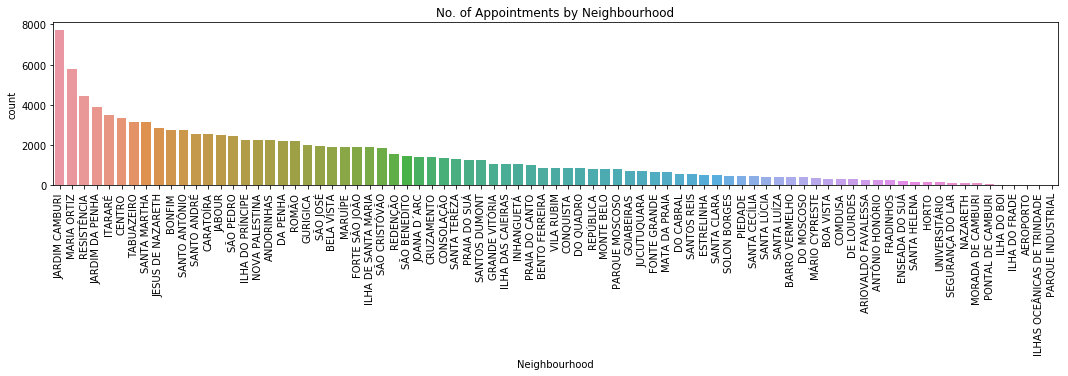

In [17]:
plt.figure(figsize=(18,3))
ax = sns.countplot(x=rawdata_csv.Neighbourhood,order=rawdata_csv.Neighbourhood.value_counts().index)
plt.xticks(rotation=90)
ax.set_title("No. of Appointments by Neighbourhood")
plt.show()

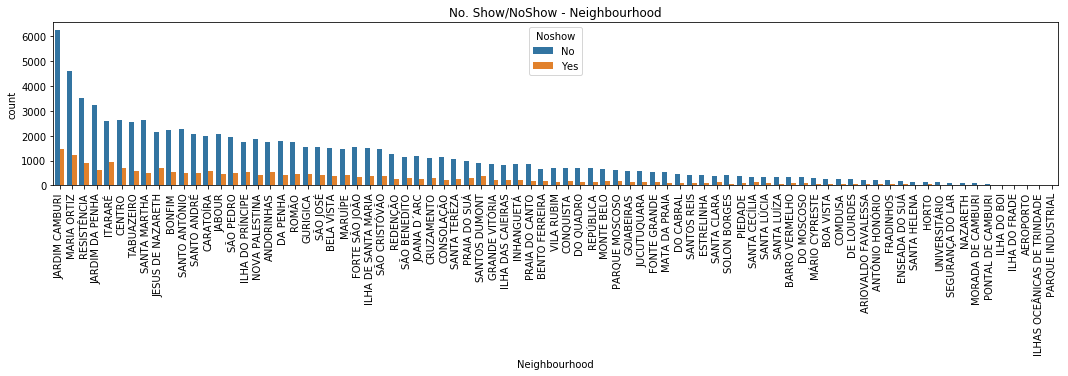

In [19]:
plt.figure(figsize=(18,3))
ax = sns.countplot(x=rawdata_csv.Neighbourhood,hue=rawdata_csv.Noshow,order=rawdata_csv.Neighbourhood.value_counts().index)
plt.xticks(rotation=90)
ax.set_title("No. Show/NoShow - Neighbourhood")
plt.show()

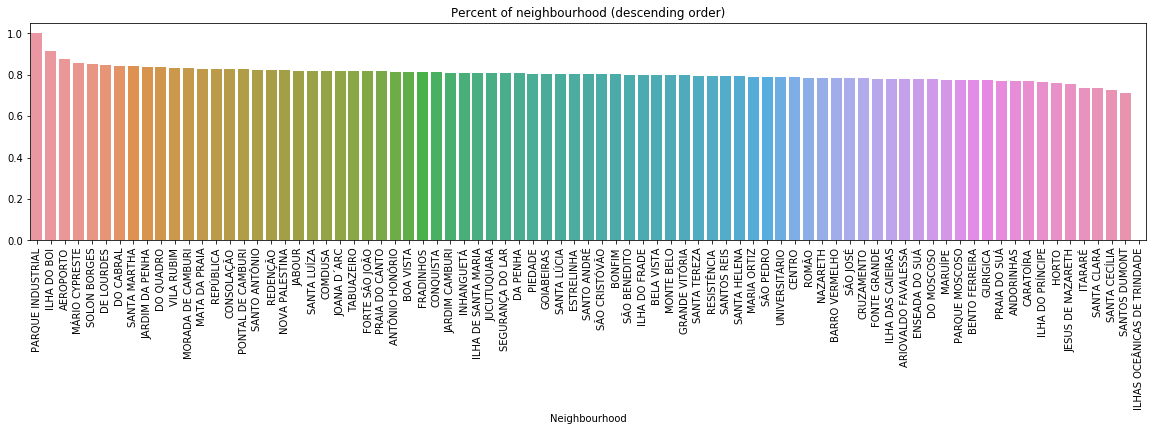

In [21]:
neighbourhood_ratio = rawdata_csv[rawdata_csv.Noshow == 'No'].groupby(['Neighbourhood']).size()/rawdata_csv.groupby(['Neighbourhood']).size()
neighbourhood_ratio= neighbourhood_ratio.sort_values(ascending=False)
plt.figure(figsize=(20,4))
ax = sns.barplot(x=neighbourhood_ratio.index, y=neighbourhood_ratio, order=neighbourhood_ratio.index)
ax.set_title("Percent of neighbourhood (descending order)") 
plt.xticks(rotation=90)
plt.show()

有些地区预约人数较少，导致比率波动较大，存在100%和0的情况，为便于分析，把预约数小于50的地区排除在外。如下：

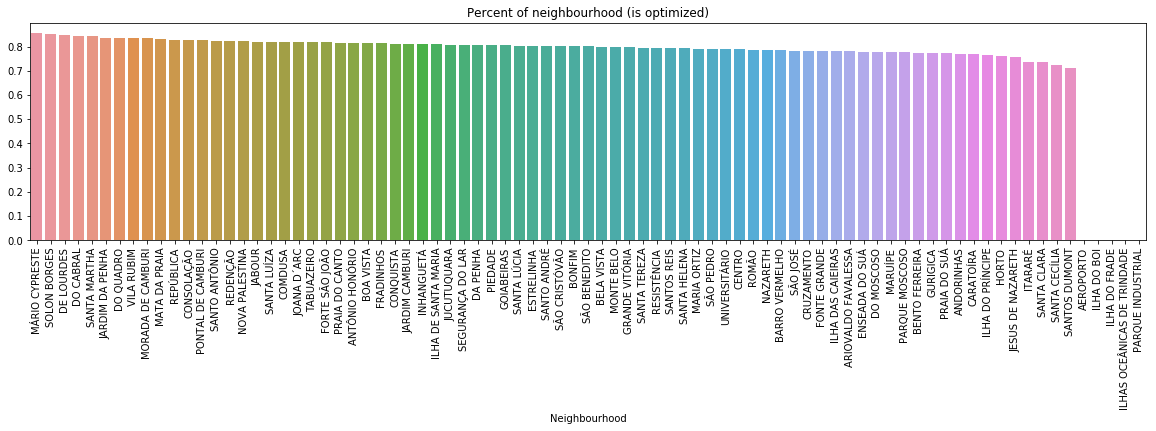

In [32]:
after_deal_datasize = rawdata_csv[rawdata_csv.Noshow == 'No'].groupby(['Neighbourhood']).size()
after_deal_data = after_deal_datasize[after_deal_datasize.values>50]
neighbourhood_ratio = after_deal_data/rawdata_csv.groupby(['Neighbourhood']).size()
neighbourhood_ratio= neighbourhood_ratio.sort_values(ascending=False)
plt.figure(figsize=(20,4))
ax = sns.barplot(x=neighbourhood_ratio.index, y=neighbourhood_ratio, order=neighbourhood_ratio.index)
ax.set_title("Percent of neighbourhood (is optimized)")
plt.xticks(rotation=90)
plt.show()

就诊情况基于地区分析：
1.无法知道地区离医院的距离，不能确认是否爽约是否与距离远近相关
2.从筛选后的数据来看，大部分地区，爽约情况与地区呈弱相关趋势。
3.SANTOS DUMONT爽约占比最大，约25%，MARIO CYPRESTE爽约占比最小，约10%。

### Scholarship

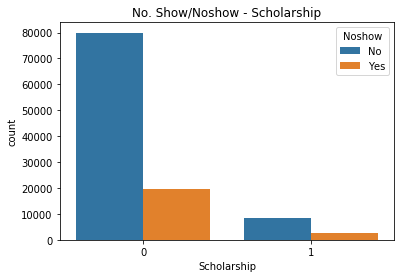

In [192]:

ax = sns.countplot(x=rawdata_csv.Scholarship,hue=rawdata_csv.Noshow,data=rawdata_csv)
ax.set_title("No. Show/Noshow - Scholarship")
plt.show()

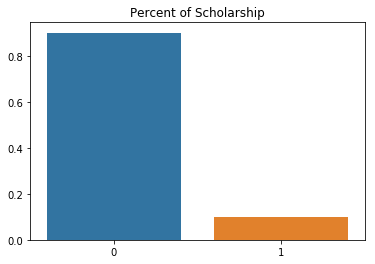

In [40]:
scholarship_counts_normalize = rawdata_csv.Scholarship.value_counts(normalize=True)
ax = sns.barplot(x=scholarship_counts_normalize.index,y=scholarship_counts_normalize.values)
ax.set_title("Percent of Scholarship")
plt.show()

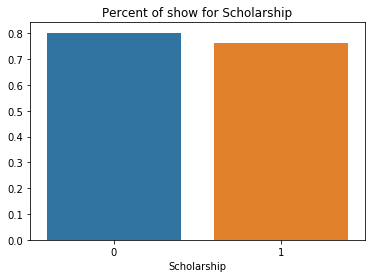

In [41]:
scholarship_ratio = rawdata_csv[rawdata_csv.Noshow == 'No'].groupby(['Scholarship']).size()/rawdata_csv.groupby(['Scholarship']).size()
ax = sns.barplot(x=scholarship_ratio.index, y=scholarship_ratio, order=scholarship_ratio.index)
ax.set_title("Percent of show for Scholarship") 
plt.show()

就诊情况与医保情况分析：   
1.约85%的患者没有医保，有医保患者爽约比约为75%
2.无医保患者爽约比约为80%

### Hypertension

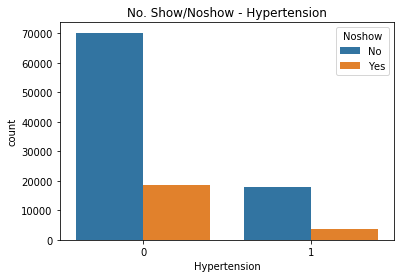

In [193]:
ax = sns.countplot(x=rawdata_csv.Hypertension,hue=rawdata_csv.Noshow,data=rawdata_csv)
ax.set_title("No. Show/Noshow - Hypertension")
plt.show()

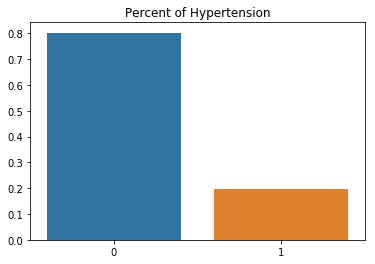

In [209]:
hypertension_counts_normalize = rawdata_csv.Hypertension.value_counts(normalize=True)
ax = sns.barplot(x=hypertension_counts_normalize.index,y=hypertension_counts_normalize.values)
ax.set_title("Percent of Hypertension")
plt.show()

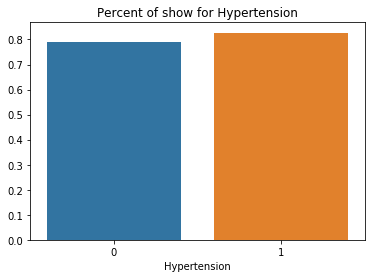

In [210]:
hypertension_ratio = rawdata_csv[rawdata_csv.Noshow == 'No'].groupby(['Hypertension']).size()/rawdata_csv.groupby(['Hypertension']).size()
ax = sns.barplot(x=hypertension_ratio.index, y=hypertension_ratio, order=hypertension_ratio.index)
ax.set_title("Percent of show for Hypertension") 
plt.show()

就诊情况基于高血压情况分析：   
1.约20%人群患有高血压（说明高血压越来越普遍，需要大力宣传高血压的危害、以及如何预防高血压）
2.高血压患者的爽约占比约10%，一般患者爽约率为20%（也侧面说明高血压患者生病后就诊比正常人更加迫切。）

### Diabetes

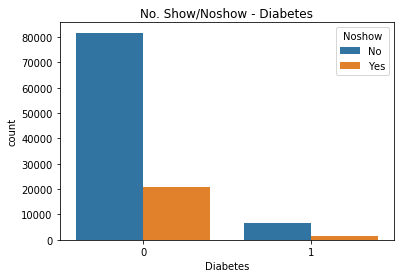

In [194]:
ax = sns.countplot(x=rawdata_csv.Diabetes,hue=rawdata_csv.Noshow,data=rawdata_csv)
ax.set_title("No. Show/Noshow - Diabetes")
plt.show()

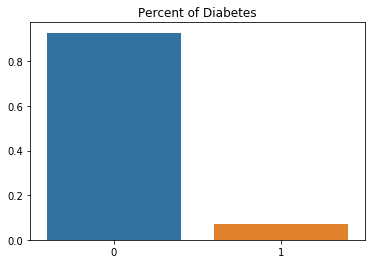

In [207]:
diabetes_counts_normalize = rawdata_csv.Diabetes.value_counts(normalize=True)
ax = sns.barplot(x=diabetes_counts_normalize.index,y=diabetes_counts_normalize.values)
ax.set_title("Percent of Diabetes")
plt.show()

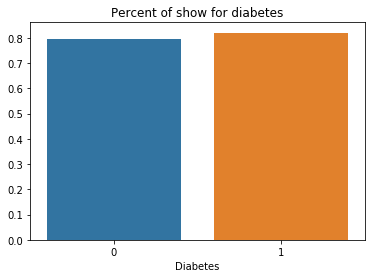

In [208]:
diabetes_ratio = rawdata_csv[rawdata_csv.Noshow == 'No'].groupby(['Diabetes']).size()/rawdata_csv.groupby(['Diabetes']).size()
ax = sns.barplot(x=diabetes_ratio.index, y=diabetes_ratio, order=diabetes_ratio.index)
ax.set_title("Percent of show for diabetes") 
plt.show()

就诊情况基于糖尿病情况分析：   
1.约有5%人患有糖尿病   
2.糖尿病患者爽约比为15%，其他患者爽约率20%      

### Alcoholism

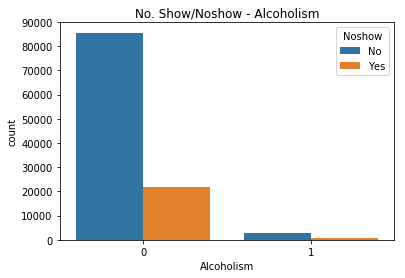

In [195]:
ax = sns.countplot(x=rawdata_csv.Alcoholism,hue=rawdata_csv.Noshow,data=rawdata_csv)
ax.set_title("No. Show/Noshow - Alcoholism")
plt.show()

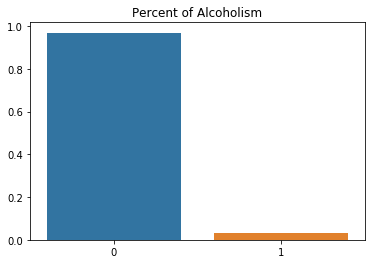

In [205]:
alcoholism_counts_normalize = rawdata_csv.Alcoholism.value_counts(normalize=True)
ax = sns.barplot(x=alcoholism_counts_normalize.index,y=alcoholism_counts_normalize.values)
ax.set_title("Percent of Alcoholism")
plt.show()

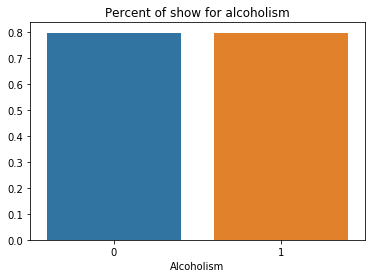

In [206]:
alcoholism_ratio = rawdata_csv[rawdata_csv.Noshow == 'No'].groupby(['Alcoholism']).size()/rawdata_csv.groupby(['Alcoholism']).size()
ax = sns.barplot(x=alcoholism_ratio.index, y=alcoholism_ratio, order=alcoholism_ratio.index)
ax.set_title("Percent of show for alcoholism") 
plt.show()

就诊情况基于酗酒情况分析：   
酗酒人数占比较少，爽约占与正常人无差异，说明这些人酗酒的同时，面对生病问题还是挺严肃的。

### Handicap

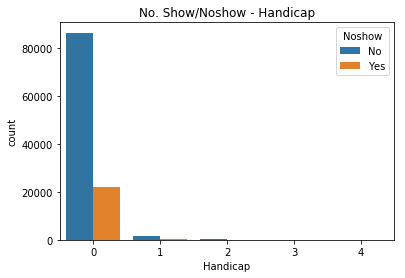

In [196]:
ax = sns.countplot(x=rawdata_csv.Handicap,hue=rawdata_csv.Noshow,data=rawdata_csv)
ax.set_title("No. Show/Noshow - Handicap")
plt.show()

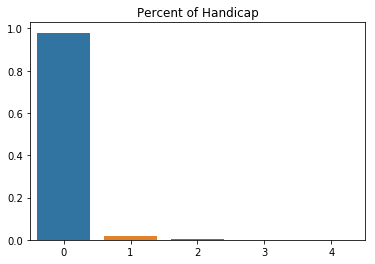

In [42]:
handicap_counts_normalize = rawdata_csv.Handicap.value_counts(normalize=True)
ax = sns.barplot(x=handicap_counts_normalize.index,y=handicap_counts_normalize.values)
ax.set_title("Percent of Handicap")
plt.show()

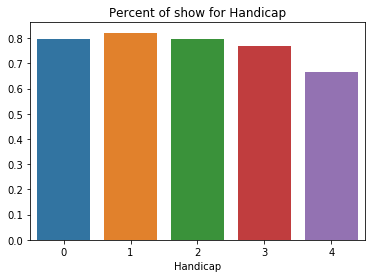

In [204]:
handicap_ratio = rawdata_csv[rawdata_csv.Noshow == 'No'].groupby(['Handicap']).size()/rawdata_csv.groupby(['Handicap']).size()
ax = sns.barplot(x=handicap_ratio.index, y=handicap_ratio, order=handicap_ratio.index)
ax.set_title("Percent of show for Handicap") 
plt.show()

就诊情况基于残疾情况分析：   
1.残障人士占就诊人数比例非常低，从数据图中几乎可以忽略
2.从爽约占比来看，残障等级越高，爽约呈上升趋势。   
可能是残障等级越高，其就诊更加不便，增加了其爽约的风险。第四等级残障人士，爽约比约35%。

### SMSreceived

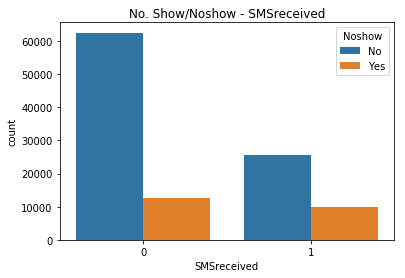

In [197]:
ax = sns.countplot(x=rawdata_csv.SMSreceived,hue=rawdata_csv.Noshow,data=rawdata_csv)
ax.set_title("No. Show/Noshow - SMSreceived")
plt.show()

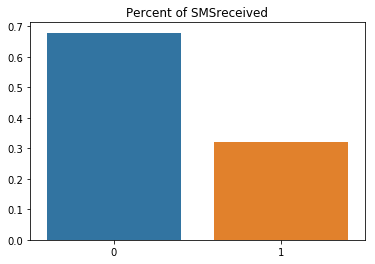

In [199]:
smsreceived_counts_normalize = rawdata_csv.SMSreceived.value_counts(normalize=True)
ax = sns.barplot(x=smsreceived_counts_normalize.index,y=smsreceived_counts_normalize.values)
ax.set_title("Percent of SMSreceived")
plt.show()

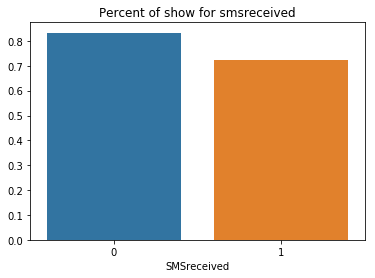

In [201]:
smsreceived_ratio = rawdata_csv[rawdata_csv.Noshow == 'No'].groupby(['SMSreceived']).size()/rawdata_csv.groupby(['SMSreceived']).size()
ax = sns.barplot(x=smsreceived_ratio.index, y=smsreceived_ratio, order=smsreceived_ratio.index)
ax.set_title("Percent of show for smsreceived") 
plt.show()

就诊情况基于接受短信分析：   
1.有不到三次的人有接收到短信，但是接收短信人群的爽约率反而比没有接收短信的要高
2.没有接收到短信的人数基数是接收到短信人数基数的二倍多，但其爽约比率高于已接收短信。说明有其他更强的因素影响是否爽约。

### AppointmentWeekday

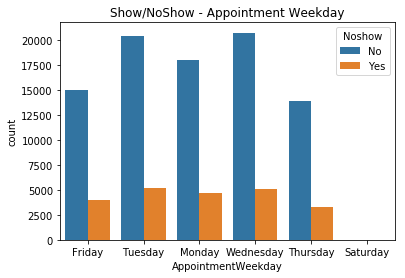

In [184]:
ax = sns.countplot(x=rawdata_csv.AppointmentWeekday,hue=rawdata_csv.Noshow,data=rawdata_csv)
ax.set_title("Show/NoShow - Appointment Weekday")
plt.show()

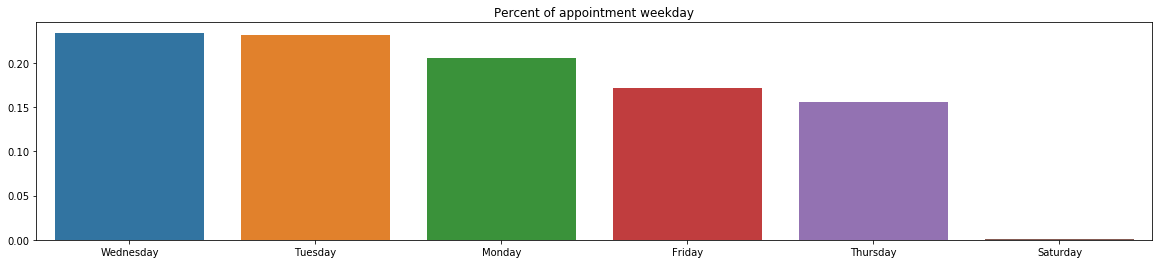

In [185]:
appointmentWeekday_counts_normalize = rawdata_csv.AppointmentWeekday.value_counts(normalize=True)
appointmentWeekday_counts_normalize = appointmentWeekday_counts_normalize.sort_values(ascending=False)
plt.figure(figsize=(20,4))
ax = sns.barplot(x=appointmentWeekday_counts_normalize.index,y=appointmentWeekday_counts_normalize.values,order=appointmentWeekday_counts_normalize.index)
ax.set_title("Percent of appointment weekday")
plt.show()

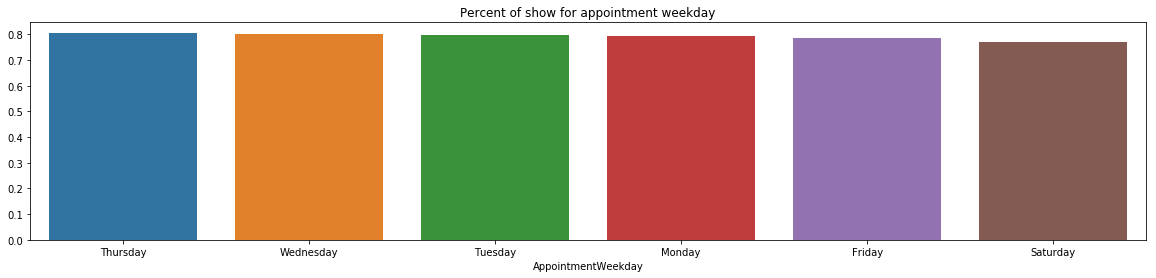

In [186]:
appointmentWeekday_ratio = rawdata_csv[rawdata_csv.Noshow == 'No'].groupby(['AppointmentWeekday']).size()/rawdata_csv.groupby(['AppointmentWeekday']).size()
appointmentWeekday_ratio= appointmentWeekday_ratio.sort_values(ascending=False)
plt.figure(figsize=(20,4))
ax = sns.barplot(x=appointmentWeekday_ratio.index, y=appointmentWeekday_ratio, order=appointmentWeekday_ratio.index)
ax.set_title("Percent of show for appointment weekday") 
plt.show()

就诊情况基于星期分析：    
1.星期二、星期三就诊人数相当，爽约人数也相当。占比最大。   
2.星期六就诊人数较工作日少很多，无星期日就诊？星期日医院休息？
3.从每天爽约占比来看，工作日每天爽约占比相当，星期六爽约比例略高于工作日

### ApartDay

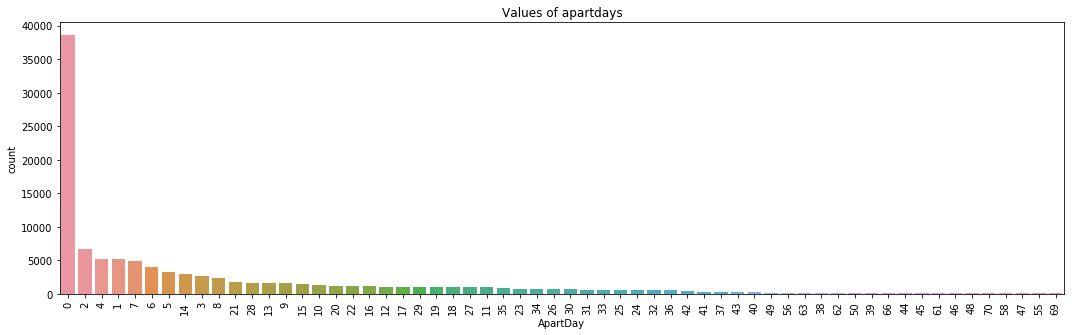

In [187]:
plt.figure(figsize=(18,5))
ax = sns.countplot(x=rawdata_csv.ApartDay,order=rawdata_csv.ApartDay.value_counts().iloc[0:60].index)
ax.set_title("Values of apartdays")
plt.xticks(rotation=90)
plt.show()

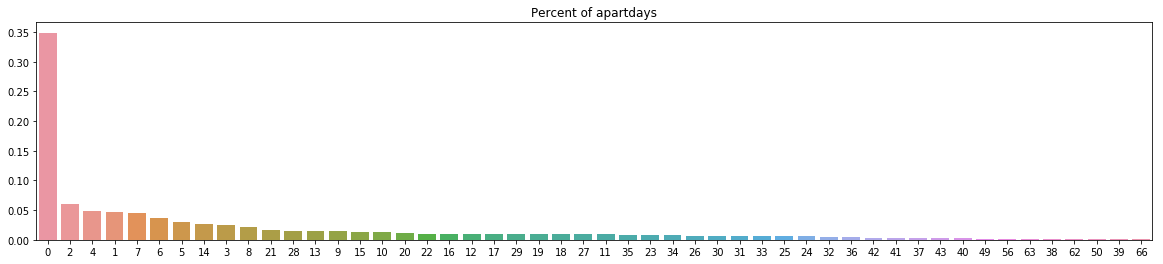

In [155]:
apartday_normalize = rawdata_csv.ApartDay.value_counts(normalize=True)
type(apartday_normalize)
apartday_normalize = apartday_normalize.sort_values(ascending=False)
plt.figure(figsize=(20,4))
ax = sns.barplot(x=apartday_normalize.index[0:50],y=apartday_normalize.values[0:50],order=apartday_normalize.index[0:50])
ax.set_title("Percent of apartdays")
plt.show()

在同一天预约就诊占比约35%，远大于其他间隔天数的预约量

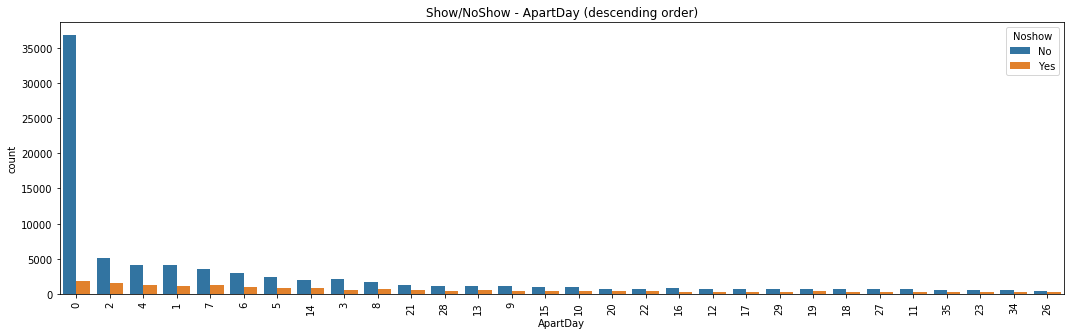

In [179]:
plt.figure(figsize=(18,5))
ax = sns.countplot(x=rawdata_csv.ApartDay,hue=rawdata_csv.Noshow,order=rawdata_csv.ApartDay.value_counts().iloc[:30].index)
plt.xticks(rotation=90)
ax.set_title("Show/NoShow - ApartDay (descending order)")
plt.show()

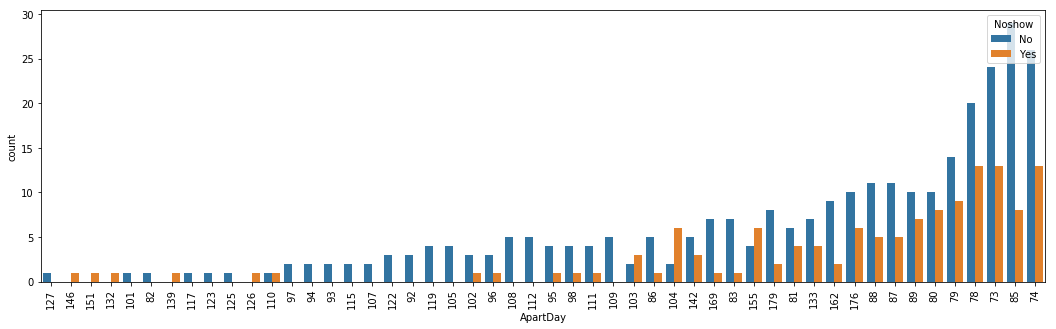

In [71]:
plt.figure(figsize=(18,5))
ax = sns.countplot(x=rawdata_csv.ApartDay,hue=rawdata_csv.Noshow,order=rawdata_csv.ApartDay.value_counts(ascending=True).iloc[:50].index)
plt.xticks(rotation=90)
ax.set_title("Show/NoShow - ApartDay (ascending order)")

plt.show()

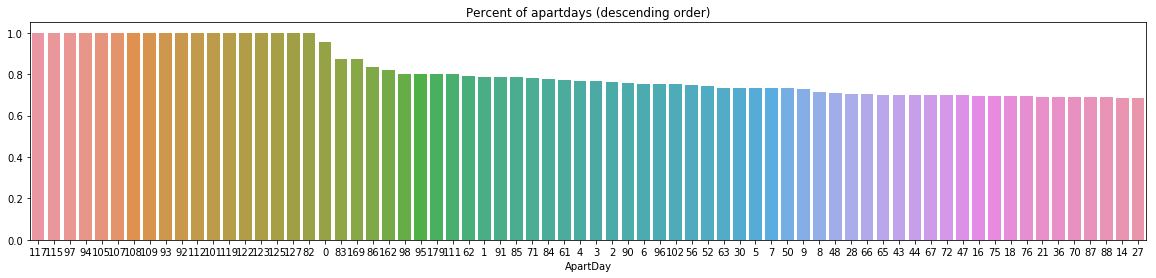

In [178]:
apart_ratio = rawdata_csv[rawdata_csv.Noshow == 'No'].groupby(['ApartDay']).size()/rawdata_csv.groupby(['ApartDay']).size()
apart_ratio= apart_ratio.sort_values(ascending=False)
plt.figure(figsize=(20,4))
ax = sns.barplot(x=apart_ratio.index, y=apart_ratio, order=apart_ratio.index[0:70])
ax.set_title("Percent of apartdays (descending order)") 
plt.show()

由上图可知：   
间隔大于100天的按时就诊率为100%，由于其基数较小，只有几个或几十，不具有太大参考价值，为方便观察，把基数相对较小的剔出，下面将count小于200的间隔天数剔出。

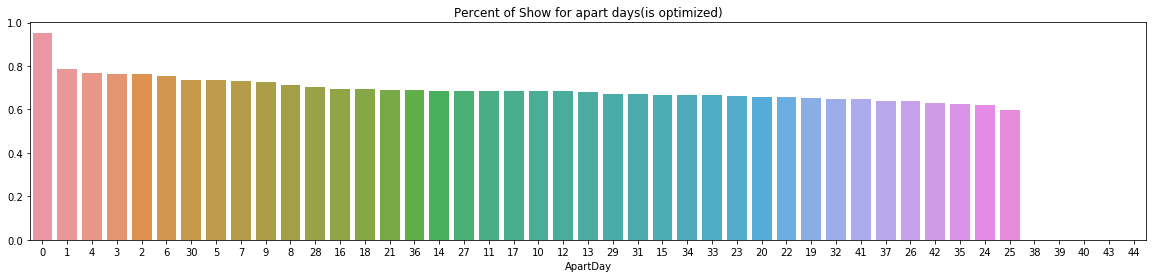

In [177]:
after_deal_datasize = rawdata_csv[rawdata_csv.Noshow == 'No'].groupby(['ApartDay']).size()
after_deal_data = after_deal_datasize[after_deal_datasize.values>200]
apart_ratio = after_deal_data/rawdata_csv.groupby(['ApartDay']).size()
apart_ratio= apart_ratio.sort_values(ascending=False)
plt.figure(figsize=(20,4))
ax = sns.barplot(x=apart_ratio.index, y=apart_ratio, order=apart_ratio.index[0:45])
ax.set_title("Percent of Show for apart days(is optimized)")
plt.show()

间隔天数分析：   
1.有约35%的预约量是就诊当天预约的，当天预约高达95%以上都按时就诊，爽约比例不到5%。    
2.大致趋势是间隔时间越短，爽约比例越低。（爽约比例与预约量是正相关的，预约量越大，爽约的比例也将相应提高）

<a id='conclusions'></a>
## 结论

>与爽约相关的变量：是否有医保、高血压、糖尿病、残障人士。   
1.有Scholarship患者就诊率为75%，无Scholarship患者就诊率为80%,Scholarship会影响就诊率。   
2.高血压患者就诊率为90%，其他患者就诊率为80%。   
3.糖尿病患者就诊率为85%，其他患者就诊率为80%   
4.第四等级残障人士患者就诊率约为65%，第三等级残障人士患者就诊率约为75%，第二等级残障人士就诊率约为78%，第一等级残障人士就诊率约为82%，其他患者就诊率为80%      
5.预约就诊在同一天的患者，就诊率在95%。间隔时间越长，就诊率约低，最低就诊率约65%   

>缺陷：   
1.对地区情况不清楚，不能爽约率与地区的相关性   
2.预约就诊时间只有日期，没有具体就诊时间段，无法知晓就诊时间段是否会导致爽约


In [46]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'noshowappointments.ipynb'])

0